In [1]:
import pandas as pd
import ast
from itertools import chain
from nltk import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
     

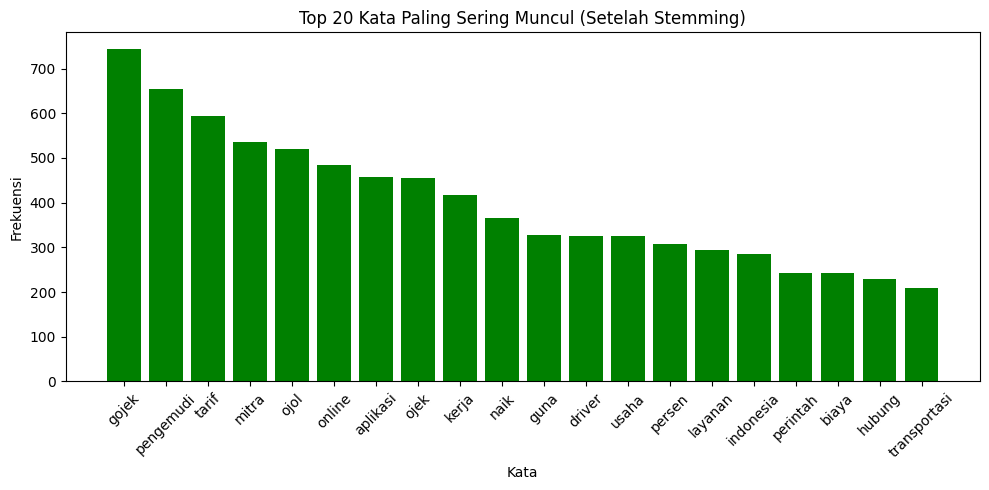

📊 Top 20 kata paling sering muncul:
            Word  Frequency
0          gojek        744
1      pengemudi        654
2          tarif        595
3          mitra        535
4           ojol        520
5         online        485
6       aplikasi        457
7           ojek        456
8          kerja        418
9           naik        365
10          guna        327
11        driver        326
12         usaha        325
13        persen        308
14       layanan        293
15     indonesia        285
16      perintah        243
17         biaya        242
18        hubung        230
19  transportasi        208


In [3]:
# === Load dataset ===
df = pd.read_csv("../Data/cleaned_gojek_text_final.csv")

# Pastikan kolom 'stemmed_tokens' tersedia dan dalam bentuk list
if 'stemmed_tokens' in df.columns:
    if isinstance(df['stemmed_tokens'].iloc[0], str):
        df['stemmed_tokens'] = df['stemmed_tokens'].apply(ast.literal_eval)
else:
    raise KeyError("Kolom 'stemmed_tokens' tidak ditemukan di dataset.")

# === Gabungkan semua kata hasil stemming ===
all_words = list(chain.from_iterable(df['stemmed_tokens']))

# === Hitung frekuensi kata ===
freq_dist = FreqDist(all_words)
freq_df = pd.DataFrame(freq_dist.most_common(20), columns=['Word', 'Frequency'])

# === Visualisasi ===
plt.figure(figsize=(10,5))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='green')
plt.title("Top 20 Kata Paling Sering Muncul (Setelah Stemming)")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

print("📊 Top 20 kata paling sering muncul:")
print(freq_df)


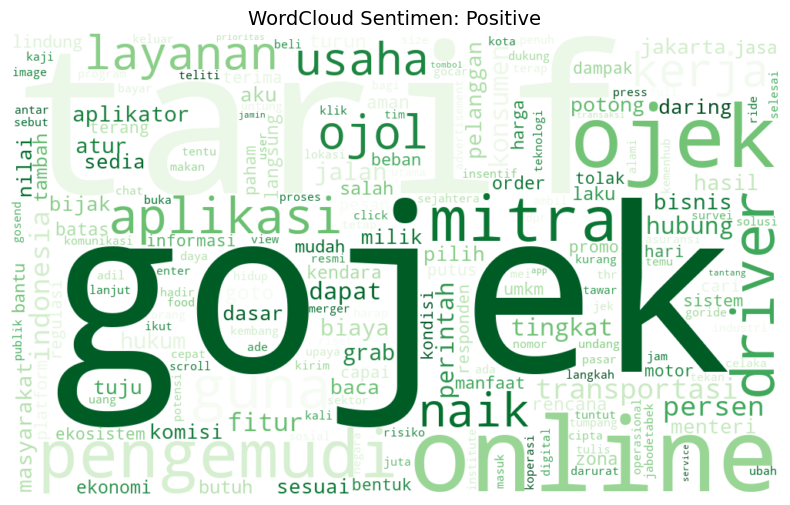

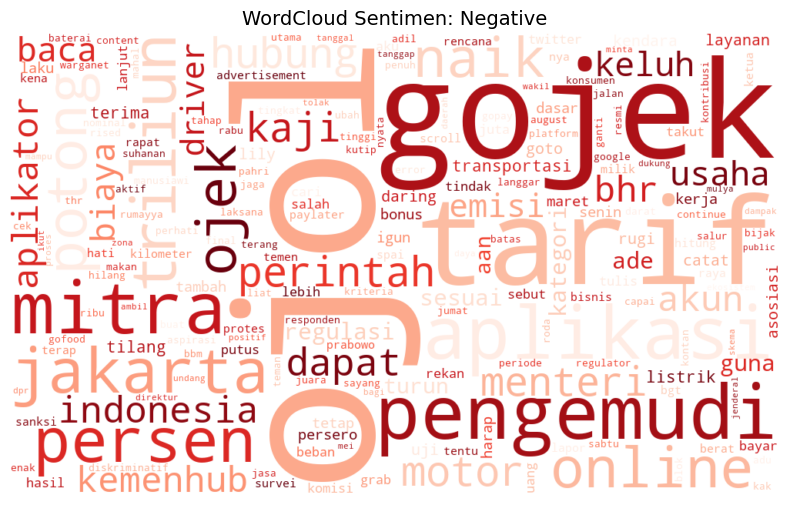

In [7]:
# ============================================================
# ☁️ WORDCLOUD UNTUK SENTIMEN POSITIF & NEGATIF
# ============================================================

import ast
from itertools import chain
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1️⃣ Pastikan kolom token siap digunakan
if 'stemmed_tokens' in df.columns:
    if isinstance(df['stemmed_tokens'].iloc[0], str):
        df['stemmed_tokens'] = df['stemmed_tokens'].apply(ast.literal_eval)
else:
    raise KeyError("Kolom 'stemmed_tokens' tidak ditemukan di dataset.")

# 2️⃣ Normalisasi kolom sentimen (positive / negative / neutral)
df['sentiment'] = df['sentiment'].str.lower().str.strip()

# 3️⃣ Fungsi untuk gabungkan token per sentimen
def get_text_by_sentiment(label):
    tokens = list(chain.from_iterable(df[df['sentiment'] == label]['stemmed_tokens']))
    return ' '.join(tokens)

# 4️⃣ Fungsi untuk menampilkan WordCloud
def plot_wordcloud(text, title, color_map):
    if not text.strip():
        print(f"Tidak ada teks untuk kategori '{title}'.")
        return

    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color='white',
        collocations=False,
        colormap=color_map
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Sentimen: {title.capitalize()}", fontsize=14)
    plt.show()

# ============================================================
# GENERATE WORDCLOUD UNTUK SENTIMEN POSITIF DAN NEGATIF
# ============================================================

for sentiment_label, color_map in [
    ("positive", "Greens"),
    ("negative", "Reds")
]:
    text = get_text_by_sentiment(sentiment_label)
    plot_wordcloud(text, sentiment_label, color_map)


C:\Users\fajri\AppData\Local\Temp\ipykernel_17464\1337515074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')


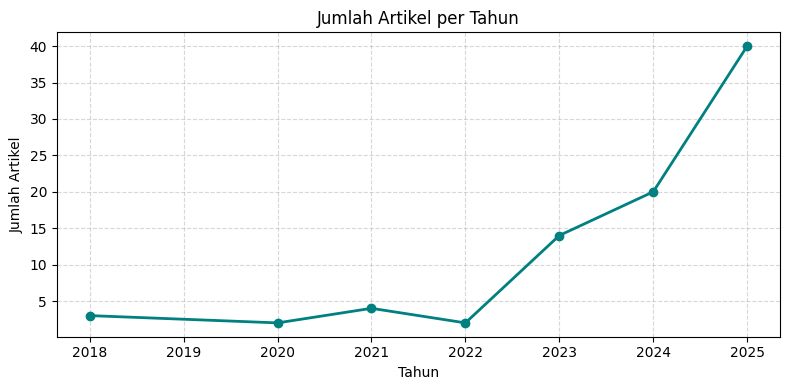

📊 Jumlah artikel per tahun:
   Year  count
0  2018      3
1  2020      2
2  2021      4
3  2022      2
4  2023     14
5  2024     20
6  2025     40


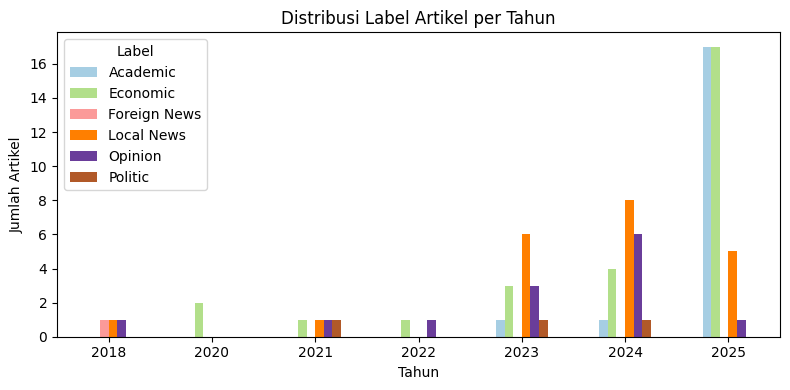

📊 Distribusi label per tahun:
tag   Academic  Economic  Foreign News  Local News  Opinion  Politic
Year                                                                
2018         0         0             1           1        1        0
2020         0         2             0           0        0        0
2021         0         1             0           1        1        1
2022         0         1             0           0        1        0
2023         1         3             0           6        3        1
2024         1         4             0           8        6        1
2025        17        17             0           5        1        0


In [11]:
# =====================
# 📈 DESCRIPTIVE ANALYSIS
# =====================

import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom tanggal dan label ada
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
df = df.dropna(subset=['tanggal', 'tag'])

# === Tambah kolom tahun ===
df['Year'] = df['tanggal'].dt.year

# === Jumlah artikel per tahun ===
article_per_year = df.groupby('Year').size().reset_index(name='count')

plt.figure(figsize=(8, 4))
plt.plot(article_per_year['Year'], article_per_year['count'],
         marker='o', color='teal', linewidth=2)
plt.title('Jumlah Artikel per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Artikel')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("📊 Jumlah artikel per tahun:")
print(article_per_year)

# === Distribusi label berdasarkan tahun ===
label_per_year = df.groupby(['Year', 'tag']).size().unstack(fill_value=0)

label_per_year.plot(kind='bar', stacked=False, figsize=(8, 4), colormap='Paired')
plt.title('Distribusi Label Artikel per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

print("📊 Distribusi label per tahun:")
print(label_per_year)
